# Import libraries

In [2]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torchvision import datasets, transforms
import pickle

# Prepare Simple CNN model for training

In [2]:
BATCH_SIZE = 32
NUM_OF_WORKERS = 2
NUM_OF_EPOCHS = 40
NAME_OF_MODEL = "simple_cnn"
EARLY_STOPPING_PATIENCE = 15

trainset = datasets.FashionMNIST('data/', download=True, train=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_OF_WORKERS)
testset = datasets.FashionMNIST('data/', download=True, train=False, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_OF_WORKERS)

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device:", device)

device: cpu


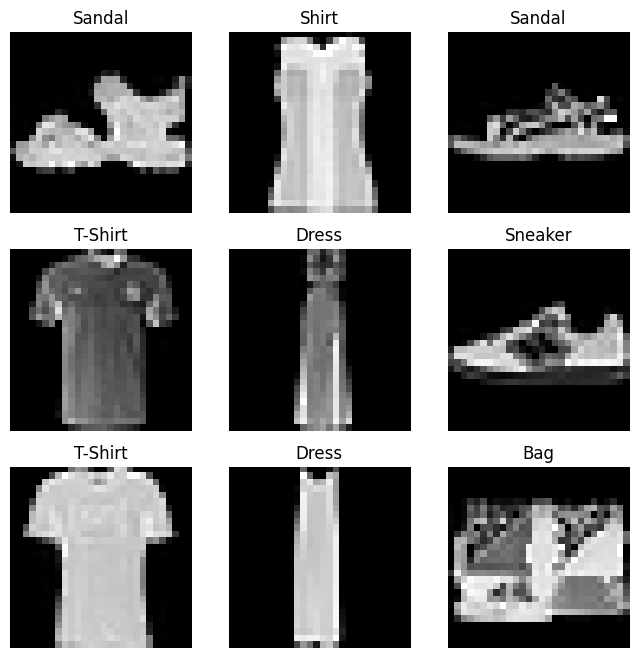

In [4]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(trainset), size=(1,)).item()
    img, label = trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [5]:
# PyTorch models inherit from torch.nn.Module
class GarmentClassifier(nn.Module):
    def __init__(self):
        super(GarmentClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = GarmentClassifier()

In [6]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = torch.nn.CrossEntropyLoss()

In [7]:
batch_sizes = [BATCH_SIZE]

from training_and_evaluate import train_and_eval

batch_tr_info, batch_te_info = train_and_eval(model=model, trainset=trainset, testset=testset, batch_sizes=batch_sizes,
                                              NAME_OF_MODEL=NAME_OF_MODEL, folder_to_save_in="",
                                              NUM_OF_EPOCHS=NUM_OF_EPOCHS,
                                              early_stopping_patience=EARLY_STOPPING_PATIENCE, NUM_OF_WORKERS=NUM_OF_WORKERS)

Device: cpu
Epoch 1 Training...


100%|██████████| 1875/1875 [00:24<00:00, 77.59it/s] 


Epoch 1 Testing...


100%|██████████| 313/313 [00:05<00:00, 57.53it/s] 


Epoch 1: Train_accuracy: 75.22%, Train_loss: 0.659099, Test_accuracy: 82.41%, Test_loss: 0.493744
Epoch 2 Training...


100%|██████████| 1875/1875 [00:16<00:00, 115.58it/s]


Epoch 2 Testing...


100%|██████████| 313/313 [00:03<00:00, 81.50it/s] 


Epoch 2: Train_accuracy: 84.81%, Train_loss: 0.417203, Test_accuracy: 85.90%, Test_loss: 0.385654
Epoch 3 Training...


100%|██████████| 1875/1875 [00:25<00:00, 73.71it/s] 


Epoch 3 Testing...


100%|██████████| 313/313 [00:04<00:00, 71.90it/s] 


Epoch 3: Train_accuracy: 87.17%, Train_loss: 0.353203, Test_accuracy: 86.79%, Test_loss: 0.364120
Epoch 4 Training...


100%|██████████| 1875/1875 [00:15<00:00, 120.08it/s]


Epoch 4 Testing...


100%|██████████| 313/313 [00:03<00:00, 81.62it/s] 


Epoch 4: Train_accuracy: 88.23%, Train_loss: 0.320995, Test_accuracy: 88.32%, Test_loss: 0.325718
Epoch 5 Training...


100%|██████████| 1875/1875 [00:17<00:00, 108.94it/s]


Epoch 5 Testing...


100%|██████████| 313/313 [00:04<00:00, 73.12it/s] 


Epoch 5: Train_accuracy: 89.00%, Train_loss: 0.299590, Test_accuracy: 86.24%, Test_loss: 0.369939
Epoch 6 Training...


100%|██████████| 1875/1875 [00:15<00:00, 119.55it/s]


Epoch 6 Testing...


100%|██████████| 313/313 [00:03<00:00, 82.29it/s] 


Epoch 6: Train_accuracy: 89.75%, Train_loss: 0.279615, Test_accuracy: 88.03%, Test_loss: 0.315039
Epoch 7 Training...


100%|██████████| 1875/1875 [00:16<00:00, 111.45it/s]


Epoch 7 Testing...


100%|██████████| 313/313 [00:04<00:00, 75.80it/s] 


Epoch 7: Train_accuracy: 90.24%, Train_loss: 0.263460, Test_accuracy: 88.77%, Test_loss: 0.307070
Epoch 8 Training...


100%|██████████| 1875/1875 [00:16<00:00, 113.36it/s]


Epoch 8 Testing...


100%|██████████| 313/313 [00:03<00:00, 79.01it/s] 


Epoch 8: Train_accuracy: 90.53%, Train_loss: 0.254948, Test_accuracy: 87.75%, Test_loss: 0.336368
Epoch 9 Training...


100%|██████████| 1875/1875 [00:17<00:00, 106.60it/s]


Epoch 9 Testing...


100%|██████████| 313/313 [00:04<00:00, 74.79it/s] 


Epoch 9: Train_accuracy: 91.09%, Train_loss: 0.240977, Test_accuracy: 88.97%, Test_loss: 0.307088
Epoch 10 Training...


100%|██████████| 1875/1875 [00:16<00:00, 116.21it/s]


Epoch 10 Testing...


100%|██████████| 313/313 [00:03<00:00, 79.60it/s] 


Epoch 10: Train_accuracy: 91.30%, Train_loss: 0.231999, Test_accuracy: 89.55%, Test_loss: 0.289178
Epoch 11 Training...


100%|██████████| 1875/1875 [00:17<00:00, 109.47it/s]


Epoch 11 Testing...


100%|██████████| 313/313 [00:04<00:00, 72.51it/s] 


Epoch 11: Train_accuracy: 91.54%, Train_loss: 0.223438, Test_accuracy: 89.37%, Test_loss: 0.296221
Epoch 12 Training...


100%|██████████| 1875/1875 [00:16<00:00, 112.85it/s]


Epoch 12 Testing...


100%|██████████| 313/313 [00:04<00:00, 76.67it/s] 


Epoch 12: Train_accuracy: 91.98%, Train_loss: 0.213609, Test_accuracy: 89.54%, Test_loss: 0.294032
Epoch 13 Training...


100%|██████████| 1875/1875 [00:16<00:00, 110.47it/s]


Epoch 13 Testing...


100%|██████████| 313/313 [00:04<00:00, 73.82it/s] 


Epoch 13: Train_accuracy: 92.29%, Train_loss: 0.204802, Test_accuracy: 89.58%, Test_loss: 0.304317
Epoch 14 Training...


100%|██████████| 1875/1875 [00:16<00:00, 110.99it/s]


Epoch 14 Testing...


100%|██████████| 313/313 [00:04<00:00, 75.21it/s] 


Epoch 14: Train_accuracy: 92.58%, Train_loss: 0.198142, Test_accuracy: 89.49%, Test_loss: 0.326447
Epoch 15 Training...


100%|██████████| 1875/1875 [00:17<00:00, 108.84it/s]


Epoch 15 Testing...


100%|██████████| 313/313 [00:03<00:00, 80.89it/s] 


Epoch 15: Train_accuracy: 92.82%, Train_loss: 0.190631, Test_accuracy: 89.76%, Test_loss: 0.300298
Epoch 16 Training...


100%|██████████| 1875/1875 [00:16<00:00, 114.89it/s]


Epoch 16 Testing...


100%|██████████| 313/313 [00:04<00:00, 76.31it/s] 


Epoch 16: Train_accuracy: 92.91%, Train_loss: 0.186669, Test_accuracy: 89.23%, Test_loss: 0.320699
Epoch 17 Training...


100%|██████████| 1875/1875 [00:17<00:00, 108.89it/s]


Epoch 17 Testing...


100%|██████████| 313/313 [00:03<00:00, 79.69it/s] 


Epoch 17: Train_accuracy: 93.29%, Train_loss: 0.178414, Test_accuracy: 89.95%, Test_loss: 0.308470
Epoch 18 Training...


100%|██████████| 1875/1875 [00:16<00:00, 115.51it/s]


Epoch 18 Testing...


100%|██████████| 313/313 [00:04<00:00, 76.19it/s] 


Epoch 18: Train_accuracy: 93.51%, Train_loss: 0.172934, Test_accuracy: 89.54%, Test_loss: 0.329583
Epoch 19 Training...


100%|██████████| 1875/1875 [00:17<00:00, 108.10it/s]


Epoch 19 Testing...


100%|██████████| 313/313 [00:04<00:00, 77.28it/s] 


Epoch 19: Train_accuracy: 93.58%, Train_loss: 0.169132, Test_accuracy: 89.76%, Test_loss: 0.327477
Epoch 20 Training...


100%|██████████| 1875/1875 [00:16<00:00, 111.77it/s]


Epoch 20 Testing...


100%|██████████| 313/313 [00:03<00:00, 78.87it/s] 


Epoch 20: Train_accuracy: 93.84%, Train_loss: 0.162242, Test_accuracy: 89.87%, Test_loss: 0.310741
Epoch 21 Training...


100%|██████████| 1875/1875 [00:16<00:00, 115.80it/s]


Epoch 21 Testing...


100%|██████████| 313/313 [00:04<00:00, 76.24it/s] 


Epoch 21: Train_accuracy: 94.15%, Train_loss: 0.156510, Test_accuracy: 89.75%, Test_loss: 0.335045
Epoch 22 Training...


100%|██████████| 1875/1875 [00:17<00:00, 107.33it/s]


Epoch 22 Testing...


100%|██████████| 313/313 [00:04<00:00, 77.70it/s] 


Epoch 22: Train_accuracy: 94.21%, Train_loss: 0.151869, Test_accuracy: 89.55%, Test_loss: 0.353905
Epoch 23 Training...


100%|██████████| 1875/1875 [00:16<00:00, 115.66it/s]


Epoch 23 Testing...


100%|██████████| 313/313 [00:04<00:00, 76.10it/s] 


Epoch 23: Train_accuracy: 94.34%, Train_loss: 0.148148, Test_accuracy: 90.07%, Test_loss: 0.340971
Epoch 24 Training...


100%|██████████| 1875/1875 [00:18<00:00, 102.00it/s]


Epoch 24 Testing...


100%|██████████| 313/313 [00:04<00:00, 71.10it/s] 


Epoch 24: Train_accuracy: 94.58%, Train_loss: 0.141888, Test_accuracy: 89.77%, Test_loss: 0.348608
Epoch 25 Training...


100%|██████████| 1875/1875 [00:16<00:00, 117.03it/s]


Epoch 25 Testing...


100%|██████████| 313/313 [00:03<00:00, 79.36it/s] 

Epoch 25: Train_accuracy: 94.71%, Train_loss: 0.138621, Test_accuracy: 90.02%, Test_loss: 0.363009
Early stopping triggered. No improvement for 15 epochs.


## Plot information

Import saved information

In [4]:
file_path = 'training_information/simple_cnn/unfreeze_FC_layer/batch_te_info.pkl'
with open(file_path, 'rb') as file:
    batch_te_info = pickle.load(file)
file_path = 'training_information/simple_cnn/unfreeze_FC_layer/batch_tr_info.pkl'
with open(file_path, 'rb') as file:
    batch_tr_info = pickle.load(file)

Plot information

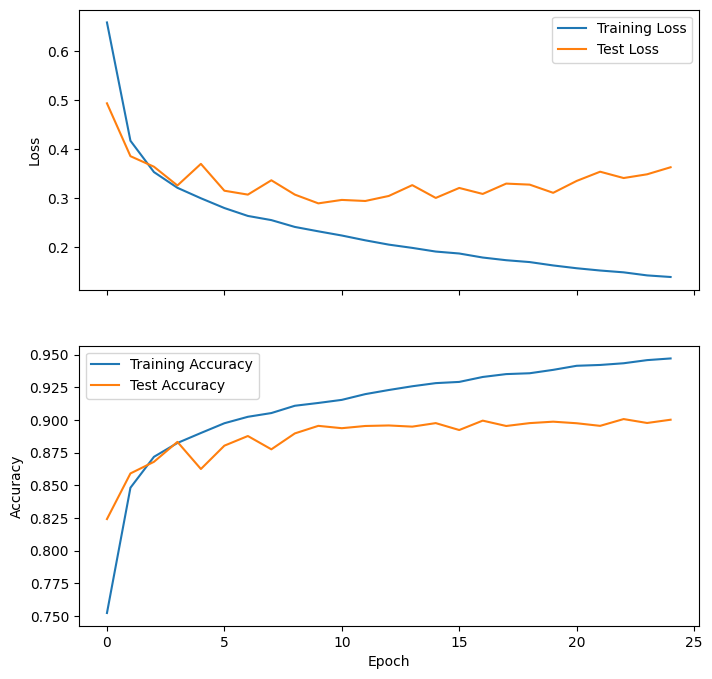

In [8]:
import matplotlib.pyplot as plt

# Create a figure with larger subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 8))  # Adjust the figsize as needed

# Plot the training and test loss on the first subplot
ax1.plot(batch_tr_info[BATCH_SIZE]["loss"], label="Training Loss")
ax1.plot(batch_te_info[BATCH_SIZE]["loss"], label="Test Loss")
ax1.set_ylabel("Loss")
ax1.legend()

# Plot the training and test accuracy on the second subplot
ax2.plot(batch_tr_info[BATCH_SIZE]["acc"], label="Training Accuracy")
ax2.plot(batch_te_info[BATCH_SIZE]["acc"], label="Test Accuracy")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.legend()

# Show the plot
plt.show()

Best test loss for each batch size with it's corresponding accuracy

In [9]:
for batch_size, info in batch_te_info.items():
    best_test_loss = 100
    best_epoch = 0
    for epoch, loss in enumerate(info["loss"]):
        if best_test_loss > loss:
            best_test_loss = loss
            best_epoch = epoch
    print(f"Epoch {best_epoch} has {round(best_test_loss, 3)} loss with {round(info['acc'][best_epoch]*100, 2)}% "
          f"accuracy")

Epoch 9 has 0.289 loss with 89.55% accuracy


# MixUp

In [10]:
model = GarmentClassifier().to(device)

In [11]:
batch_sizes = [BATCH_SIZE]

from training_and_evaluate import train_and_eval

batch_tr_info, batch_te_info = train_and_eval(model=model, trainset=trainset, testset=testset, batch_sizes=batch_sizes,
                                              NAME_OF_MODEL=NAME_OF_MODEL, folder_to_save_in="mixup",
                                              NUM_OF_EPOCHS=NUM_OF_EPOCHS,
                                              early_stopping_patience=EARLY_STOPPING_PATIENCE,
                                              NUM_OF_WORKERS=NUM_OF_WORKERS, mixup=True)

Device: cpu
Epoch 1 Training...


100%|██████████| 1875/1875 [00:16<00:00, 111.32it/s]


Epoch 1 Testing...


100%|██████████| 313/313 [00:03<00:00, 82.88it/s] 


Epoch 1: Train_accuracy: 66.07%, Train_loss: 1.259337, Test_accuracy: 73.42%, Test_loss: 1.092710
Epoch 2 Training...


100%|██████████| 1875/1875 [00:15<00:00, 118.90it/s]


Epoch 2 Testing...


100%|██████████| 313/313 [00:03<00:00, 84.55it/s] 


Epoch 2: Train_accuracy: 73.87%, Train_loss: 1.056663, Test_accuracy: 74.52%, Test_loss: 1.010753
Epoch 3 Training...


100%|██████████| 1875/1875 [00:16<00:00, 111.94it/s]


Epoch 3 Testing...


100%|██████████| 313/313 [00:03<00:00, 85.09it/s] 


Epoch 3: Train_accuracy: 75.21%, Train_loss: 1.001610, Test_accuracy: 76.01%, Test_loss: 0.976611
Epoch 4 Training...


100%|██████████| 1875/1875 [00:16<00:00, 116.94it/s]


Epoch 4 Testing...


100%|██████████| 313/313 [00:03<00:00, 85.45it/s] 


Epoch 4: Train_accuracy: 76.81%, Train_loss: 0.970358, Test_accuracy: 75.69%, Test_loss: 0.978127
Epoch 5 Training...


100%|██████████| 1875/1875 [00:16<00:00, 114.27it/s]


Epoch 5 Testing...


100%|██████████| 313/313 [00:03<00:00, 81.93it/s] 


Epoch 5: Train_accuracy: 77.45%, Train_loss: 0.938291, Test_accuracy: 77.93%, Test_loss: 0.943964
Epoch 6 Training...


100%|██████████| 1875/1875 [00:16<00:00, 116.08it/s]


Epoch 6 Testing...


100%|██████████| 313/313 [00:03<00:00, 82.31it/s] 


Epoch 6: Train_accuracy: 78.11%, Train_loss: 0.920865, Test_accuracy: 76.90%, Test_loss: 0.929871
Epoch 7 Training...


100%|██████████| 1875/1875 [00:15<00:00, 117.64it/s]


Epoch 7 Testing...


100%|██████████| 313/313 [00:03<00:00, 87.48it/s] 


Epoch 7: Train_accuracy: 78.90%, Train_loss: 0.899048, Test_accuracy: 78.59%, Test_loss: 0.887555
Epoch 8 Training...


100%|██████████| 1875/1875 [00:16<00:00, 111.68it/s]


Epoch 8 Testing...


100%|██████████| 313/313 [00:03<00:00, 82.49it/s] 


Epoch 8: Train_accuracy: 78.74%, Train_loss: 0.898290, Test_accuracy: 78.30%, Test_loss: 0.916957
Epoch 9 Training...


100%|██████████| 1875/1875 [00:16<00:00, 117.14it/s]


Epoch 9 Testing...


100%|██████████| 313/313 [00:03<00:00, 87.61it/s] 


Epoch 9: Train_accuracy: 79.34%, Train_loss: 0.883721, Test_accuracy: 79.22%, Test_loss: 0.894687
Epoch 10 Training...


100%|██████████| 1875/1875 [00:17<00:00, 109.16it/s]


Epoch 10 Testing...


100%|██████████| 313/313 [00:04<00:00, 76.04it/s] 


Epoch 10: Train_accuracy: 79.51%, Train_loss: 0.878361, Test_accuracy: 78.55%, Test_loss: 0.909145
Epoch 11 Training...


100%|██████████| 1875/1875 [00:16<00:00, 114.88it/s]


Epoch 11 Testing...


100%|██████████| 313/313 [00:03<00:00, 80.96it/s] 


Epoch 11: Train_accuracy: 80.14%, Train_loss: 0.868009, Test_accuracy: 79.67%, Test_loss: 0.884597
Epoch 12 Training...


100%|██████████| 1875/1875 [00:17<00:00, 106.50it/s]


Epoch 12 Testing...


100%|██████████| 313/313 [00:03<00:00, 80.46it/s] 


Epoch 12: Train_accuracy: 80.21%, Train_loss: 0.864535, Test_accuracy: 78.23%, Test_loss: 0.891763
Epoch 13 Training...


100%|██████████| 1875/1875 [00:15<00:00, 117.74it/s]


Epoch 13 Testing...


100%|██████████| 313/313 [00:03<00:00, 84.31it/s] 


Epoch 13: Train_accuracy: 79.50%, Train_loss: 0.870391, Test_accuracy: 79.85%, Test_loss: 0.867374
Epoch 14 Training...


100%|██████████| 1875/1875 [00:16<00:00, 113.51it/s]


Epoch 14 Testing...


100%|██████████| 313/313 [00:03<00:00, 83.87it/s] 


Epoch 14: Train_accuracy: 80.17%, Train_loss: 0.850500, Test_accuracy: 80.04%, Test_loss: 0.883609
Epoch 15 Training...


100%|██████████| 1875/1875 [00:16<00:00, 110.49it/s]


Epoch 15 Testing...


100%|██████████| 313/313 [00:03<00:00, 83.74it/s] 


Epoch 15: Train_accuracy: 80.81%, Train_loss: 0.841536, Test_accuracy: 78.65%, Test_loss: 0.886577
Epoch 16 Training...


100%|██████████| 1875/1875 [00:17<00:00, 107.90it/s]


Epoch 16 Testing...


100%|██████████| 313/313 [00:03<00:00, 81.97it/s] 


Epoch 16: Train_accuracy: 80.34%, Train_loss: 0.844924, Test_accuracy: 79.88%, Test_loss: 0.850293
Epoch 17 Training...


100%|██████████| 1875/1875 [00:16<00:00, 112.18it/s]


Epoch 17 Testing...


100%|██████████| 313/313 [00:03<00:00, 86.18it/s] 


Epoch 17: Train_accuracy: 80.56%, Train_loss: 0.831593, Test_accuracy: 80.00%, Test_loss: 0.864460
Epoch 18 Training...


100%|██████████| 1875/1875 [00:17<00:00, 109.20it/s]


Epoch 18 Testing...


100%|██████████| 313/313 [00:04<00:00, 78.20it/s] 


Epoch 18: Train_accuracy: 80.94%, Train_loss: 0.826910, Test_accuracy: 79.58%, Test_loss: 0.873501
Epoch 19 Training...


100%|██████████| 1875/1875 [00:16<00:00, 110.62it/s]


Epoch 19 Testing...


100%|██████████| 313/313 [00:03<00:00, 81.80it/s] 


Epoch 19: Train_accuracy: 81.31%, Train_loss: 0.823461, Test_accuracy: 78.80%, Test_loss: 0.869035
Epoch 20 Training...


100%|██████████| 1875/1875 [00:17<00:00, 107.70it/s]


Epoch 20 Testing...


100%|██████████| 313/313 [00:03<00:00, 81.07it/s] 


Epoch 20: Train_accuracy: 80.99%, Train_loss: 0.834801, Test_accuracy: 81.83%, Test_loss: 0.838486
Epoch 21 Training...


100%|██████████| 1875/1875 [00:16<00:00, 111.77it/s]


Epoch 21 Testing...


100%|██████████| 313/313 [00:03<00:00, 83.60it/s] 


Epoch 21: Train_accuracy: 81.16%, Train_loss: 0.830237, Test_accuracy: 80.10%, Test_loss: 0.841239
Epoch 22 Training...


100%|██████████| 1875/1875 [00:17<00:00, 108.40it/s]


Epoch 22 Testing...


100%|██████████| 313/313 [00:03<00:00, 80.64it/s] 


Epoch 22: Train_accuracy: 81.23%, Train_loss: 0.818927, Test_accuracy: 79.84%, Test_loss: 0.862227
Epoch 23 Training...


100%|██████████| 1875/1875 [00:16<00:00, 110.42it/s]


Epoch 23 Testing...


100%|██████████| 313/313 [00:03<00:00, 85.60it/s] 


Epoch 23: Train_accuracy: 80.78%, Train_loss: 0.831587, Test_accuracy: 80.35%, Test_loss: 0.842314
Epoch 24 Training...


100%|██████████| 1875/1875 [00:19<00:00, 93.93it/s] 


Epoch 24 Testing...


100%|██████████| 313/313 [00:05<00:00, 59.40it/s] 


Epoch 24: Train_accuracy: 81.58%, Train_loss: 0.823006, Test_accuracy: 79.67%, Test_loss: 0.857693
Epoch 25 Training...


100%|██████████| 1875/1875 [00:16<00:00, 112.58it/s]


Epoch 25 Testing...


100%|██████████| 313/313 [00:03<00:00, 83.32it/s] 


Epoch 25: Train_accuracy: 81.03%, Train_loss: 0.824489, Test_accuracy: 79.80%, Test_loss: 0.858077
Epoch 26 Training...


100%|██████████| 1875/1875 [00:19<00:00, 97.97it/s] 


Epoch 26 Testing...


100%|██████████| 313/313 [00:04<00:00, 69.05it/s] 


Epoch 26: Train_accuracy: 81.36%, Train_loss: 0.820121, Test_accuracy: 79.66%, Test_loss: 0.849151
Epoch 27 Training...


100%|██████████| 1875/1875 [00:17<00:00, 109.04it/s]


Epoch 27 Testing...


100%|██████████| 313/313 [00:04<00:00, 71.51it/s] 


Epoch 27: Train_accuracy: 81.57%, Train_loss: 0.812876, Test_accuracy: 80.75%, Test_loss: 0.850669
Epoch 28 Training...


100%|██████████| 1875/1875 [00:17<00:00, 105.37it/s]


Epoch 28 Testing...


100%|██████████| 313/313 [00:03<00:00, 78.28it/s] 


Epoch 28: Train_accuracy: 81.51%, Train_loss: 0.814603, Test_accuracy: 80.60%, Test_loss: 0.834606
Epoch 29 Training...


100%|██████████| 1875/1875 [00:16<00:00, 114.25it/s]


Epoch 29 Testing...


100%|██████████| 313/313 [00:04<00:00, 77.40it/s] 


Epoch 29: Train_accuracy: 81.59%, Train_loss: 0.820759, Test_accuracy: 79.92%, Test_loss: 0.857542
Epoch 30 Training...


100%|██████████| 1875/1875 [00:17<00:00, 106.30it/s]


Epoch 30 Testing...


100%|██████████| 313/313 [00:04<00:00, 75.42it/s] 


Epoch 30: Train_accuracy: 81.64%, Train_loss: 0.812609, Test_accuracy: 79.13%, Test_loss: 0.862759
Epoch 31 Training...


100%|██████████| 1875/1875 [00:16<00:00, 111.88it/s]


Epoch 31 Testing...


100%|██████████| 313/313 [00:03<00:00, 78.86it/s] 


Epoch 31: Train_accuracy: 81.41%, Train_loss: 0.812993, Test_accuracy: 80.72%, Test_loss: 0.833486
Epoch 32 Training...


100%|██████████| 1875/1875 [00:16<00:00, 113.30it/s]


Epoch 32 Testing...


100%|██████████| 313/313 [00:03<00:00, 86.67it/s] 


Epoch 32: Train_accuracy: 81.91%, Train_loss: 0.805621, Test_accuracy: 81.48%, Test_loss: 0.840310
Epoch 33 Training...


100%|██████████| 1875/1875 [00:17<00:00, 105.93it/s]


Epoch 33 Testing...


100%|██████████| 313/313 [00:04<00:00, 68.95it/s] 


Epoch 33: Train_accuracy: 81.80%, Train_loss: 0.812885, Test_accuracy: 81.07%, Test_loss: 0.836447
Epoch 34 Training...


100%|██████████| 1875/1875 [00:16<00:00, 110.81it/s]


Epoch 34 Testing...


100%|██████████| 313/313 [00:04<00:00, 69.27it/s] 


Epoch 34: Train_accuracy: 81.96%, Train_loss: 0.807507, Test_accuracy: 79.09%, Test_loss: 0.859087
Epoch 35 Training...


100%|██████████| 1875/1875 [00:16<00:00, 116.66it/s]


Epoch 35 Testing...


100%|██████████| 313/313 [00:03<00:00, 83.95it/s] 


Epoch 35: Train_accuracy: 81.69%, Train_loss: 0.807795, Test_accuracy: 81.20%, Test_loss: 0.832147
Epoch 36 Training...


100%|██████████| 1875/1875 [00:19<00:00, 96.22it/s] 


Epoch 36 Testing...


100%|██████████| 313/313 [00:04<00:00, 65.73it/s] 


Epoch 36: Train_accuracy: 81.58%, Train_loss: 0.804544, Test_accuracy: 79.11%, Test_loss: 0.854880
Epoch 37 Training...


100%|██████████| 1875/1875 [00:17<00:00, 106.54it/s]


Epoch 37 Testing...


100%|██████████| 313/313 [00:03<00:00, 95.95it/s] 


Epoch 37: Train_accuracy: 81.75%, Train_loss: 0.804107, Test_accuracy: 81.02%, Test_loss: 0.838280
Epoch 38 Training...


100%|██████████| 1875/1875 [00:18<00:00, 98.80it/s] 


Epoch 38 Testing...


100%|██████████| 313/313 [00:04<00:00, 70.56it/s] 


Epoch 38: Train_accuracy: 82.10%, Train_loss: 0.805480, Test_accuracy: 81.12%, Test_loss: 0.837261
Epoch 39 Training...


100%|██████████| 1875/1875 [00:16<00:00, 115.26it/s]


Epoch 39 Testing...


100%|██████████| 313/313 [00:03<00:00, 91.31it/s] 


Epoch 39: Train_accuracy: 82.10%, Train_loss: 0.803527, Test_accuracy: 80.57%, Test_loss: 0.831206
Epoch 40 Training...


100%|██████████| 1875/1875 [00:17<00:00, 105.31it/s]


Epoch 40 Testing...


100%|██████████| 313/313 [00:04<00:00, 69.89it/s] 

Epoch 40: Train_accuracy: 82.03%, Train_loss: 0.807177, Test_accuracy: 80.91%, Test_loss: 0.833987


## Plot information

Import saved information

In [3]:
file_path = 'training_information/simple_cnn/mixup/batch_te_info.pkl'
with open(file_path, 'rb') as file:
    batch_te_info = pickle.load(file)
file_path = 'training_information/simple_cnn/mixup/batch_tr_info.pkl'
with open(file_path, 'rb') as file:
    batch_tr_info = pickle.load(file)

Plot information

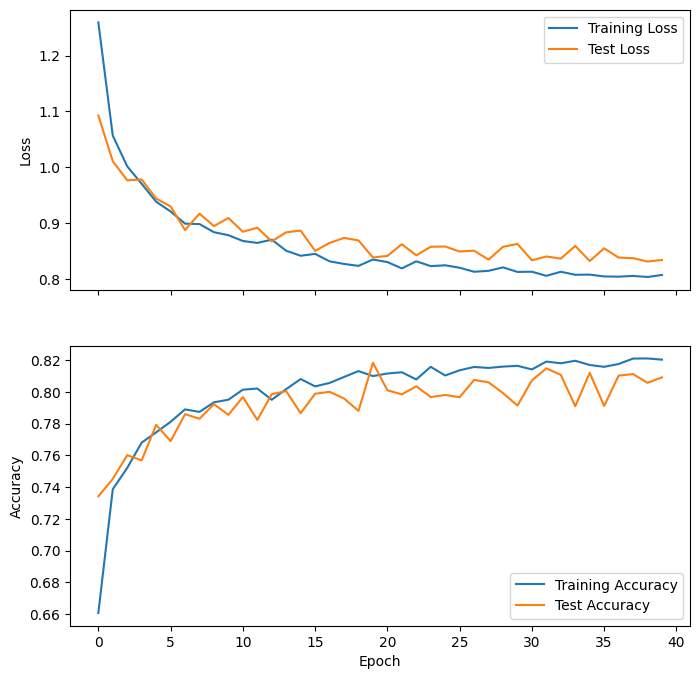

In [12]:
import matplotlib.pyplot as plt

# Create a figure with larger subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 8))  # Adjust the figsize as needed

# Plot the training and test loss on the first subplot
ax1.plot(batch_tr_info[BATCH_SIZE]["loss"], label="Training Loss")
ax1.plot(batch_te_info[BATCH_SIZE]["loss"], label="Test Loss")
ax1.set_ylabel("Loss")
ax1.legend()

# Plot the training and test accuracy on the second subplot
ax2.plot(batch_tr_info[BATCH_SIZE]["acc"], label="Training Accuracy")
ax2.plot(batch_te_info[BATCH_SIZE]["acc"], label="Test Accuracy")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.legend()

# Show the plot
plt.show()

Best test loss for each batch size with it's corresponding accuracy

In [13]:
for batch_size, info in batch_te_info.items():
    best_test_loss = 100
    best_epoch = 0
    for epoch, loss in enumerate(info["loss"]):
        if best_test_loss > loss:
            best_test_loss = loss
            best_epoch = epoch
    print(f"Batch size {batch_size}: Epoch {best_epoch} has {round(best_test_loss, 3)} loss with {round(info['acc'][best_epoch]*100, 2)}% accuracy")

Batch size 32: Epoch 38 has 0.831 loss with 80.57% accuracy
